# Random Forest : Bagging Method

1. Import Libraries

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

### 2. Import Dataset

In [10]:
df = pd.read_csv('../data/processed/TelcoCustomerChurnPredictionFeatureScaled.csv')

### 3. Test Train Split

In [1]:
X = X = df.drop(columns=["Churn"])
Y = df["Churn"].map({"Yes" : 1, "No": 0})

NameError: name 'df' is not defined

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Implementation

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

Accuracy: 0.7821149751596878
Precision: 0.6127946127946128
Recall: 0.48663101604278075
F1 Score: 0.5424739195230999

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix:
 [[920 115]
 [192 182]]


Text(50.722222222222214, 0.5, 'Actual')

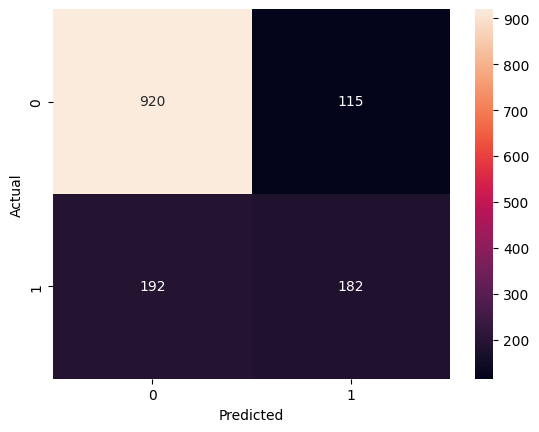

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Hyperparameter to tuning

In [26]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=False,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_rf.predict(X_test)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 500}


Accuracy: 0.8019872249822569
Precision: 0.6610169491525424
Recall: 0.5213903743315508
F1 Score: 0.5829596412556054

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[935 100]
 [179 195]]


Text(50.722222222222214, 0.5, 'Actual')

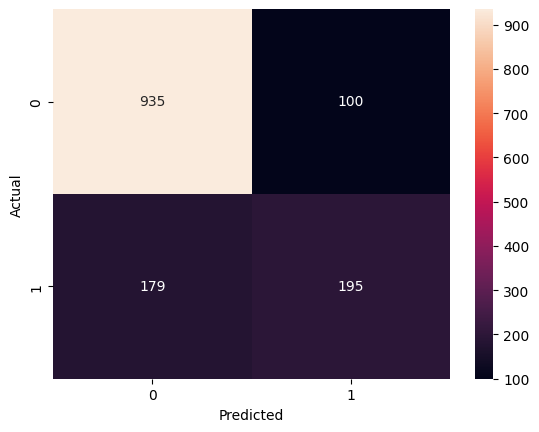

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 4. Feature Importance

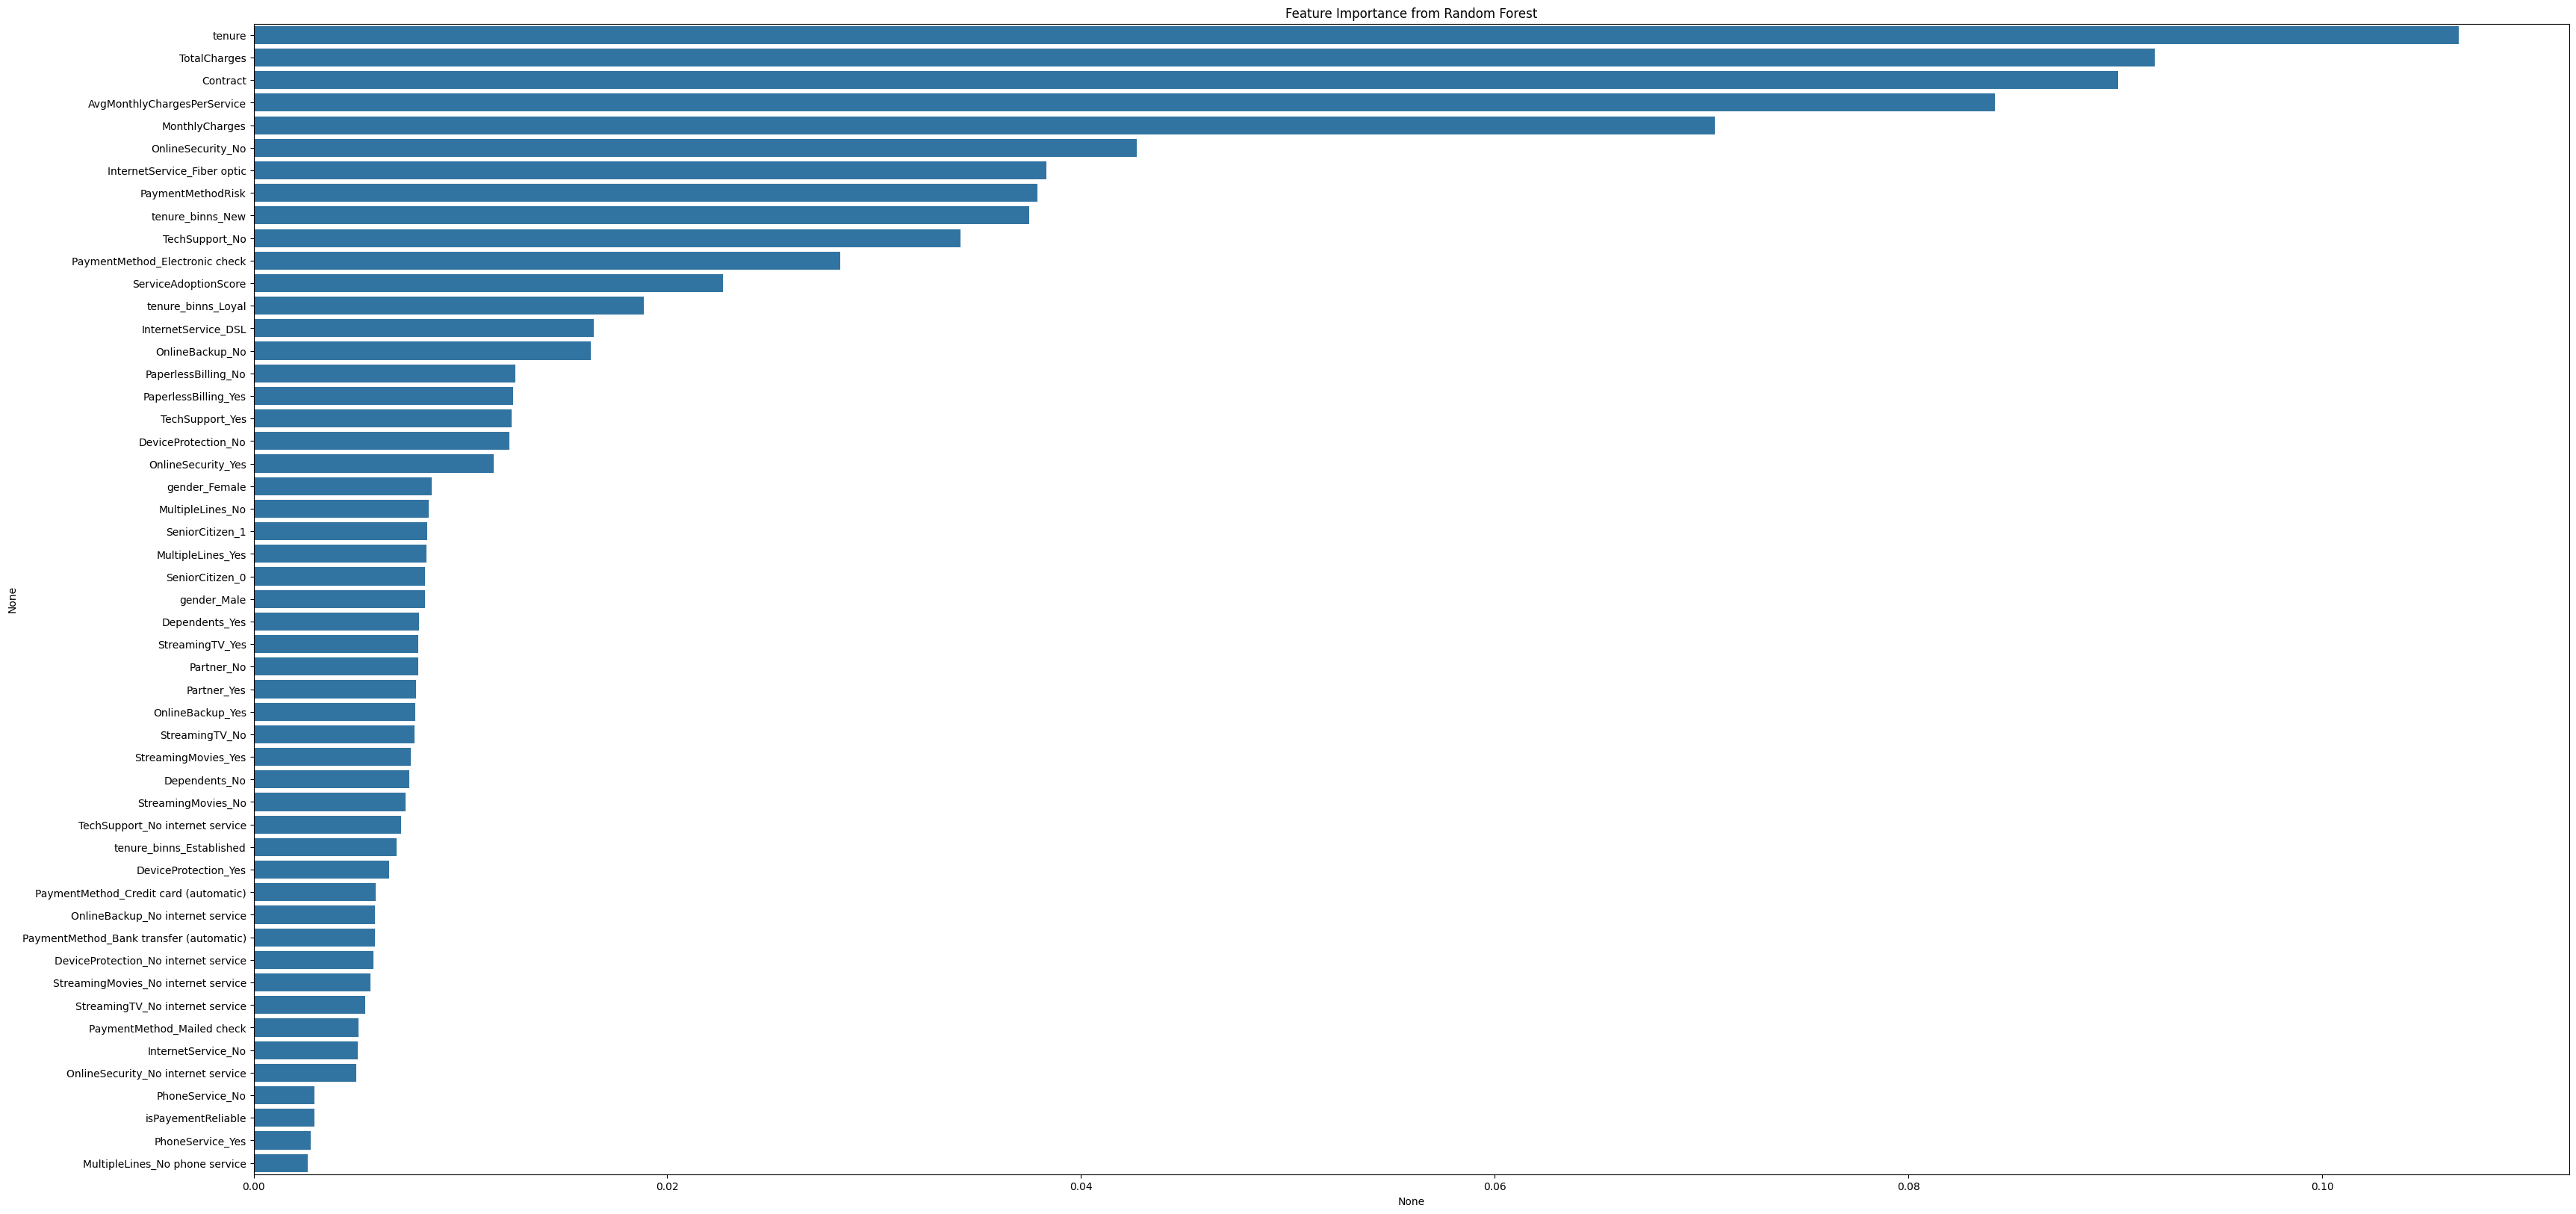

In [30]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(40,20))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.show()

### Business Insights

Tenure, Total Charges are top predictors